#  Neural Networks for Handwritten Digit Recognition, Binary

## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

### 2.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`

In [55]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [56]:
# load dataset
X, y = load_data()
print("Number of training(features) example:", X.shape[0])
print("The total number of pixels in each image", X[0].shape)

Number of training(features) example: 1000
The total number of pixels in each image (400,)


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  
    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

In [57]:
print("The total number of labels:", y.shape[0])

The total number of labels: 1000


- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [58]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


#### 2.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [ ]:
print ('The first element of X is: ', X[0])

In [37]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


#### 2.2.2 Visualizing the Data

You will begin by visualizing one of the training set. 

In [59]:
def random_sel_img(m):
    random_index = np.random.randint(m)
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    return X_random_reshaped, random_index


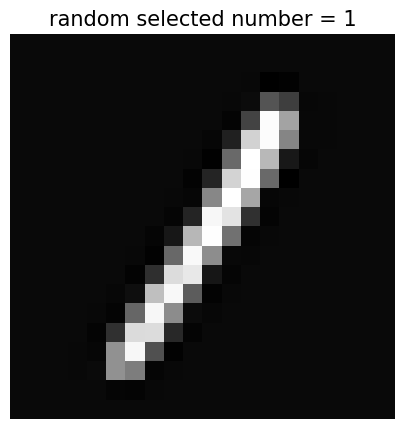

In [60]:
m, n = X.shape
fig, ax = plt.subplots(1,1, figsize=(5,5))
sel_images1 = []
X_random_reshaped, random_index = random_sel_img(m)

# Display the image
ax.imshow(X_random_reshaped, cmap='gray')

# Display the label above the image
ax.set_title(f'random selected number = {y[random_index,0]}', fontsize=15)
ax.set_axis_off()


- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

In [64]:
def random_sel_imgs(m, sel_images):
    random_index = np.random.randint(m)
    sel_images.append(random_index)
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    return X_random_reshaped, sel_images, random_index


random selected images =  [254, 833, 866, 108, 991, 893, 293, 885, 427, 943, 205, 533, 198, 233, 602, 935, 20, 605, 661, 420, 218, 381, 660, 202, 78, 173, 533, 387, 928, 651, 886, 398, 211, 184, 637, 163, 176, 301, 984, 979, 556, 679, 947, 55, 572, 815, 57, 27, 41, 297, 402, 91, 404, 78, 711, 391, 809, 386, 897, 103, 817, 270, 47, 292]


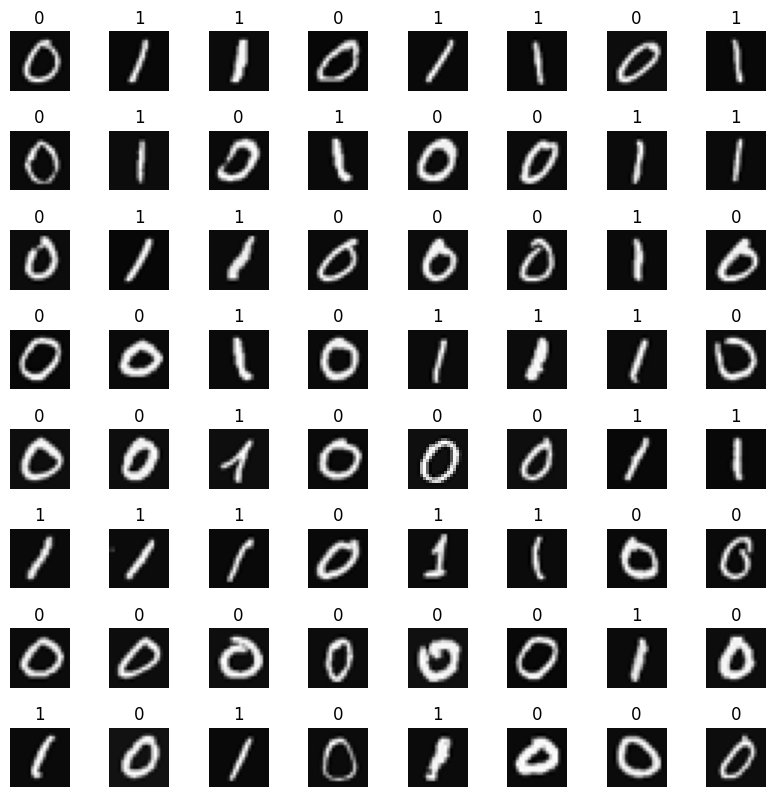

In [65]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.3)
sel_images = []
# For each iteration it would yield the next axes from that array, such that you may easily plot to all axes in a single loop.
for i,ax in enumerate(axes.flat):

    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped, sel_images, random_index = random_sel_imgs(m, sel_images)
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
print('random selected images = ', sel_images)

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

In [66]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        tf.keras.layers.Dense(units=25, activation = "sigmoid"),
        tf.keras.layers.Dense(units=15, activation = "sigmoid"),
        tf.keras.layers.Dense(units=1, activation = "sigmoid"),
        ### END CODE HERE ### 
    ], name = "my_model" 
)     

In [67]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# UNIT TESTS
from public_tests import * 

test_c1(model)

All tests passed!


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [69]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [70]:
[layer1, layer2, layer3] = model.layers

In [71]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [72]:
print(model.layers[2].weights)

[<tf.Variable 'dense_5/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.6106469 ],
       [-0.41044334],
       [-0.299873  ],
       [ 0.08254153],
       [ 0.1780464 ],
       [-0.36042413],
       [ 0.55602616],
       [ 0.55468994],
       [-0.39136523],
       [-0.15368456],
       [-0.5372551 ],
       [-0.27828035],
       [-0.21225739],
       [-0.06947881],
       [ 0.46561462]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


## 2.4 Train the model

In [73]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 0s 642us/step - loss: 0.6196
Epoch 2/20
32/32 [==============================] - 0s 594us/step - loss: 0.4374
Epoch 3/20
32/32 [==============================] - 0s 538us/step - loss: 0.2820
Epoch 4/20
32/32 [==============================] - 0s 490us/step - loss: 0.1860
Epoch 5/20
32/32 [==============================] - 0s 521us/step - loss: 0.1319
Epoch 6/20
32/32 [==============================] - 0s 493us/step - loss: 0.0994
Epoch 7/20
32/32 [==============================] - 0s 512us/step - loss: 0.0786
Epoch 8/20
32/32 [==============================] - 0s 499us/step - loss: 0.0644
Epoch 9/20
32/32 [==============================] - 0s 493us/step - loss: 0.0539
Epoch 10/20
32/32 [==============================] - 0s 494us/step - loss: 0.0463
Epoch 11/20
32/32 [==============================] - 0s 502us/step - loss: 0.0403
Epoch 12/20
32/32 [==============================] - 0s 514us/step - loss: 0.0358
Epoch 13/20
32/32 [======

## 2.5 Prediction

In [74]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

1/1 [==============================] - 0s 30ms/step
 predicting a zero: [[0.0106735]]
1/1 [==============================] - 0s 10ms/step
 predicting a one:  [[0.9842572]]
prediction after threshold: 1


1/1 [==============================] - 0s 10ms/step


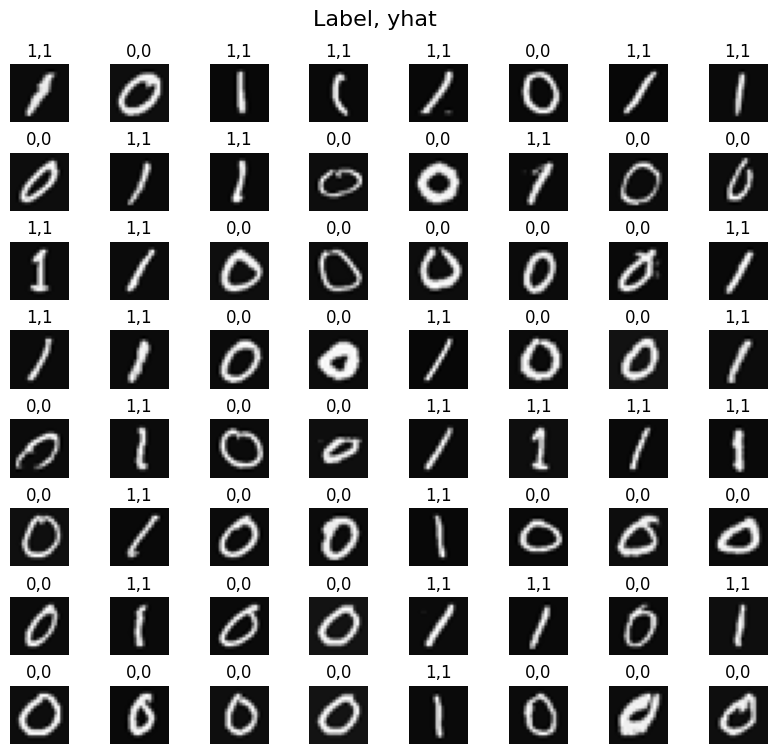

In [75]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

## 3.1 NumPy Model Implementation (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 




### Exercise 2

Below, build a dense layer subroutine. The example in lecture utilized a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` is then applied to that result. This section will not utilize some of the matrix operations described in the optional lectures. These will be explored in a later section.

In [76]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """

    # ----------------------------------------- vectorized code -----------------------------------------------
    # n = W.shape[0]
    # m = W.shape[1]

    # a_in = tf.reshape(a_in, [n,1])
    # b = tf.reshape(b, [m,1])

    # Z = np.matmul(W.T , a_in) + b
    # a_out = g(Z)

    # ----------------------------------------- not vectorized code -----------------------------------------------
    units = W.shape[1]
    a_out = np.zeros(units)
    ## START CODE HERE ### 
    for i in range(units):
        w = W[:,i]    
        z = np.dot(w, a_in) + b[i]
        a_out[i] = g(z)
    ## END CODE HERE ### 
    # ----------------------------------------- return output -----------------------------------------------
    return(a_out)


In [77]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print('x_tst = ', x_tst)
print('W_tst = ', W_tst)
print('b_tst = ', b_tst)
print('A_tst =', A_tst)

x_tst =  [0.1 0.2]
W_tst =  [[0.1 0.2 0.3]
 [0.4 0.5 0.6]]
b_tst =  [0.1 0.2 0.3]
A_tst = [0.54735762 0.57932425 0.61063923]


In [78]:
# UNIT TESTS
test_c2(my_dense)

All tests passed!


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [79]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

We can copy trained weights and biases from Tensorflow.

In [80]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [81]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


1/1 [==============================] - 0s 9ms/step


/var/folders/hg/4rr1m7ys71j8fncxtr89gr5m0000gn/T/ipykernel_2672/3591010929.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_yhat = int(my_prediction >= 0.5)
/var/folders/hg/4rr1m7ys71j8fncxtr89gr5m0000gn/T/ipykernel_2672/3591010929.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tf_yhat = int(tf_prediction >= 0.5)


1/1 [==============================] - 0s 9ms/step


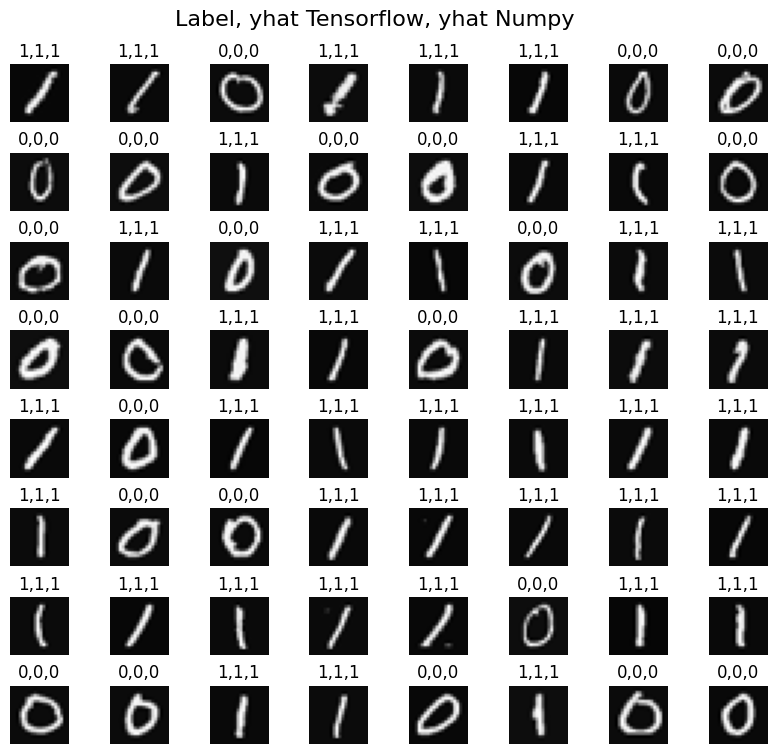

In [82]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

## 3.2 Vectorized NumPy Model Implementation (Optional)
The optional lectures described vector and matrix operations that can be used to speed the calculations.
Below describes a layer operation that computes the output for all units in a layer on a given input example:

We can demonstrate this using the examples `X` and the `W1`,`b1` parameters above. We use `np.matmul` to perform the matrix multiply. Note, the dimensions of x and W must be compatible as shown in the diagram above.

In [83]:
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


### Exercise 3

Below, compose a new `my_dense_v` subroutine that performs the layer calculations for a matrix of examples. This will utilize `np.matmul()`. 

In [88]:
# UNQ_C3
# GRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ### 
    A_out = g(A_in @ W + b)
### END CODE HERE ### 
    return(A_out)

In [89]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


In [90]:
# UNIT TESTS
test_c3(my_dense_v)

All tests passed!


Let's make a prediction with the new model. This will make a prediction on *all of the examples at once*. Note the shape of the output.

In [91]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [93]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

We'll apply a threshold of 0.5 as before, but to all predictions at once.

In [94]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

TensorShape([1000, 1])

In [95]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


Run the following cell to see predictions. This will use the predictions we just calculated above. This takes a moment to run.

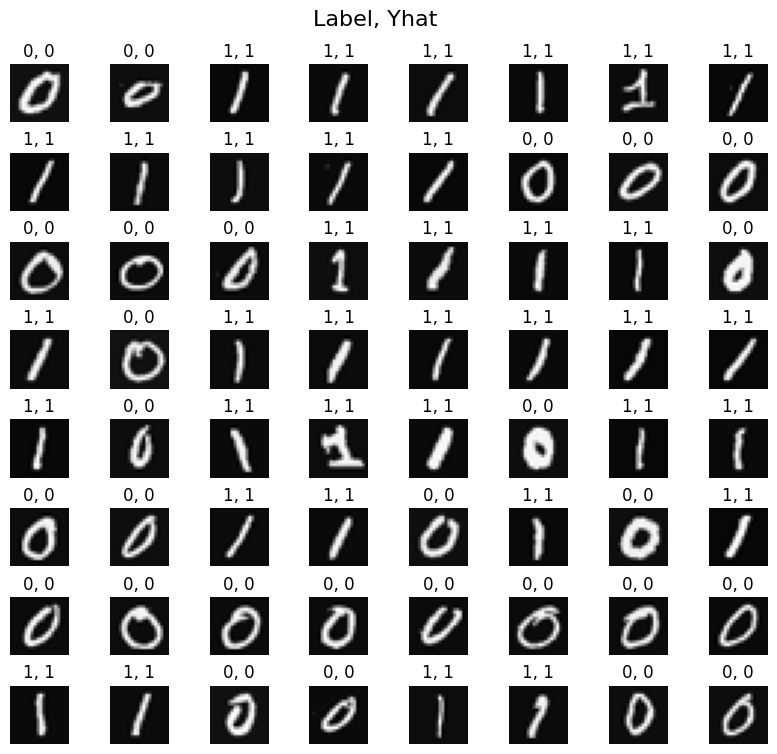

In [96]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

You can see how one of the misclassified images looks.

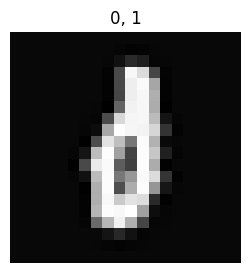

In [100]:
fig = plt.figure(figsize=(3, 3))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()